In [2]:
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 22kB/s 
     |████████████████████████████████| 4.0MB 47.4MB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101


In [1]:
pip freeze > before.txt

In [2]:
!nvidia-smi

Sun Oct 11 03:49:42 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [8]:
import os
import shutil
import platform
import numpy as np 
import pandas as pd 
from fastai.vision import *
from fastai.vision.models import *

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
import pickle
import csv
import zipfile
import glob

from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf


import shutil, os

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
# SETUP
MODEL=resnet50
BATCH = 64
SIZE = 320

DATA_PATH = '/content/gdrive/My Drive/car_model_data/'
PATH = '/content/gdrive/My Drive/car_model_data/working/'
try:
    os.makedirs(PATH)
except:
    pass

In [ ]:
# UNZIP FILES
# car_models = ['solaris', 'rio', 'polo', 'tiguan', 'octavia']
# for car in car_models:
#     zip_ref = zipfile.ZipFile(DATA_PATH + f'/{car}.zip')
#     zip_ref.extractall(DATA_PATH, )
#     zip_ref.close()

# os.rename(DATA_PATH+'KIA Rio sedan', DATA_PATH+'rio')
# os.rename(DATA_PATH+'Hyundai Solaris sedan', DATA_PATH+'solaris')
# os.rename(DATA_PATH+'Volkswagen Polo sedan', DATA_PATH+'polo')
# os.rename(DATA_PATH+'Volkswagen Tiguan', DATA_PATH+'tiguan')
# os.rename(DATA_PATH+'SKODA OCTAVIA sedan', DATA_PATH+'octavia')


# COUNT CLASSES
# for car in car_models:
#     print(car, len(os.listdir(DATA_PATH+f"{car}")))

# train_df = pd.DataFrame(columns=['id', 'Category'])
# valid_df = pd.DataFrame(columns=['id', 'Category'])
# test_df = pd.DataFrame(columns=['id', 'Category'])

In [ ]:
# np.random.seed(42)
# for car_pos, car in enumerate(car_models):
#     for car_num, car_file in enumerate(os.listdir(DATA_PATH+f"{car}/")):
#         dummy = np.random.choice([0, 1, 2], size=1, p=[.6, .2, .2])[0]
#         new_file_name = f"{car_num+car_pos*1500}.jpg"
#         if dummy == 0:
#             os.rename(DATA_PATH+f"{car}/{car_file}", DATA_PATH + f"train/{car_pos}/{new_file_name}", )
#             train_df = train_df.append({'id': new_file_name, 
#                                         'Category': car_pos}, ignore_index=True)
#         elif dummy == 1:
#             os.rename(DATA_PATH+f"{car}/{car_file}", DATA_PATH + f"valid/{car_pos}/{new_file_name}")
#             valid_df = valid_df.append({'id': new_file_name, 
#                                     'Category': car_pos}, ignore_index=True)
#         else:
#             os.rename(DATA_PATH+f"{car}/{car_file}", DATA_PATH + f"test/{car_pos}/{new_file_name}")
#             test_df = test_df.append({'id': new_file_name, 
#                                       'Category': car_pos}, ignore_index=True)

# for df in ['/train/', '/valid/', '/test/']:
#     for num in range(len(os.listdir(DATA_PATH+df))):
#         print(f"df: {df}, class: {num}, len: {len(os.listdir(DATA_PATH+df+str(num)))}")

In [ ]:
# train_df.to_csv(DATA_PATH + 'train.csv', index=False)
# valid_df.to_csv(DATA_PATH + 'valid.csv', index=False)
# test_df.to_csv(DATA_PATH + 'test.csv', index=False)

In [ ]:
# for df in ['train/', 'valid/', 'test/']:
#     for num in range(len(os.listdir(DATA_PATH+df))):
#         for pics in os.listdir(DATA_PATH+df+str(num)):
#             pic = DATA_PATH+df+str(num)+'/'+pics
#             try:
#                 image = Image.open(pic)
#             except:
#                 os.remove(pic)
#                 print(pic)

In [ ]:
train_df = pd.read_csv(DATA_PATH + 'train.csv')
valid_df = pd.read_csv(DATA_PATH + 'valid.csv')
test_df = pd.read_csv(DATA_PATH + 'test.csv')

In [4]:
# def accuracy(preds, targs):
#     preds = torch.max(preds, dim=1)[1]
#     return (preds==targs).float().mean()

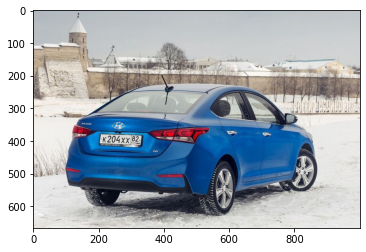

(1000, 666)

In [ ]:
image = Image.open(DATA_PATH+'/train/0/3.jpg')
imgplot = plt.imshow(image)
plt.show()
image.size

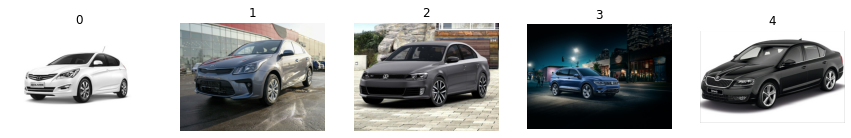

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(15,10))
for num, ax in enumerate(axes.flatten()):
    path_img = DATA_PATH+f'train/{num}'
    fnames = get_image_files(path_img)
    im = open_image(fnames[num])
    im.show(ax=ax, title=f'{num}')

In [6]:
add_tfms =  [
             cutout(n_holes=(1,20)),
            #  rotate(degrees=(-15,15), p=0.5),
            #  zoom_crop(scale=(0.75,1.5), do_rand=True),
            #  brightness(change=(0.3)),
            #  contrast(scale=0.8),
            #  jitter(magnitude=0.01),
            #  perspective_warp(magnitude=0.5),
             ]
tfms = get_transforms(max_zoom=1.,
                      max_warp=0.2,
                      max_lighting=0.3,
                    #   max_rotate=20.0,
                      xtra_tfms=add_tfms,
                      )

In [7]:
data = ImageDataBunch.from_folder(DATA_PATH,    
                                  train='train',
                                  valid='valid',
                                  test='test',
                                  ds_tfms=tfms, 
                                #   padding_mode='border',
                                  padding_mode='zeros',
                                  size=SIZE, 
                                  classes=['0', '1', '2', '3', '4'],
                                  bs=BATCH,
                                  num_workers=0,
                                  ).normalize(imagenet_stats)
data.path = pathlib.Path(PATH)

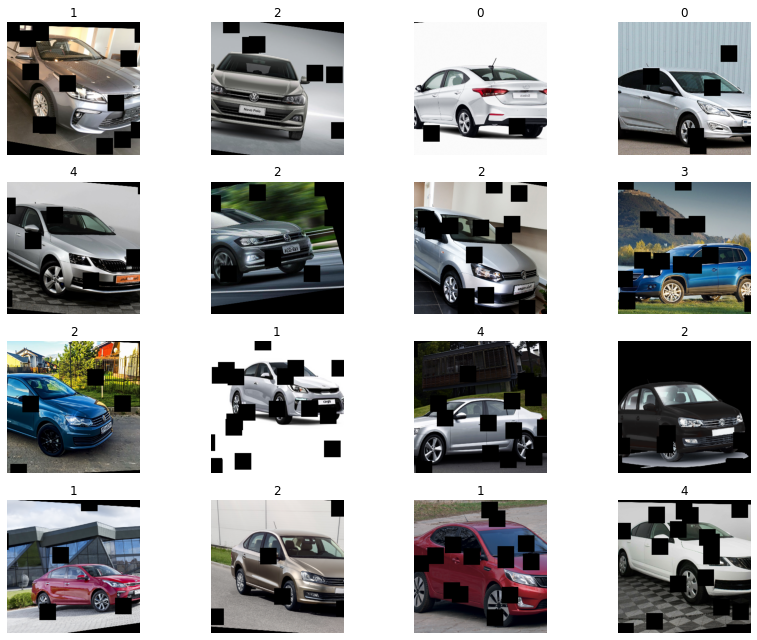

In [ ]:
data.show_batch(rows=4, figsize=(12,9))

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,time
0,2.637906,1.532991,0.371574,12:27
1,2.035650,0.805644,0.673096,07:06
2,1.366924,0.323104,0.885279,06:59
3,0.854781,0.156203,0.945178,07:00
4,0.525984,0.125659,0.961421,06:52
5,0.355920,0.109610,0.967513,07:06
6,0.249653,0.094116,0.975635,07:04
7,0.183550,0.072406,0.983756,07:01
8,0.129754,0.096399,0.971574,07:02
9,0.098532,0.068255,0.980711,07:00


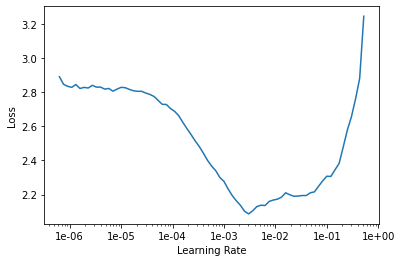

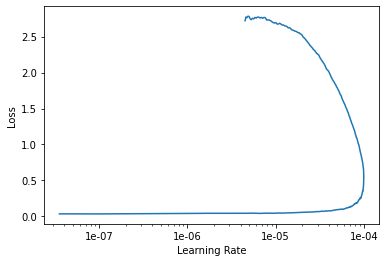

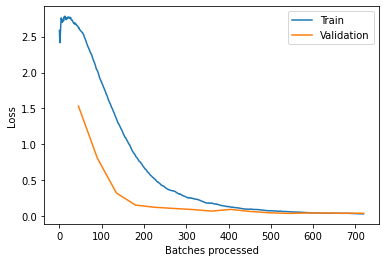

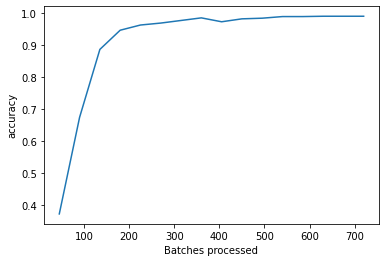

In [8]:
learn = cnn_learner(data, MODEL, metrics=accuracy, model_dir=PATH)
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()
learn.fit_one_cycle(16, max_lr=1e-4)
learn.recorder.plot()
learn.recorder.plot_losses()
learn.recorder.plot_metrics()

In [21]:
accuracy(*learn.get_preds())

tensor(0.9909)

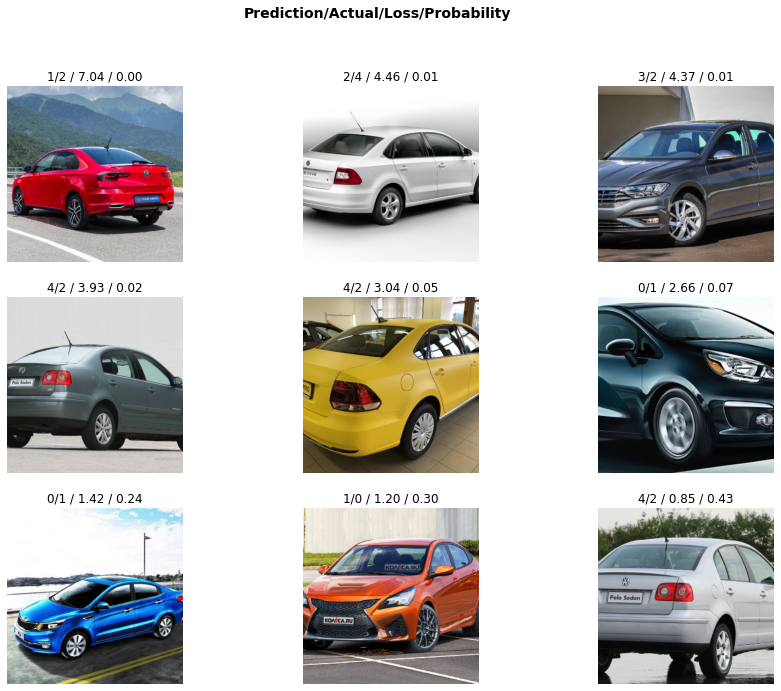

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11))

In [9]:
# 1
learn.export()

In [11]:
# 2
torch.save(learn.model, PATH+'vtb_model-arch.pth') #model architecture
torch.save(learn.model.state_dict(), PATH+'vtb_model_resnet50.pth') # model weights